In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import nltk #é um pacote Python para processamento de linguagem natural.
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.stem import RSLPStemmer #Removedor de Sufixos da Língua Portuguesa 

In [170]:
#reading datas
import time
start = time.time()
order_item = pd.read_csv("../Dados/olist_order_items_dataset.csv")
reviews = pd.read_csv("../Dados/olist_order_reviews_dataset.csv")
orders = pd.read_csv("../Dados/olist_orders_dataset.csv")
products = pd.read_csv("../Dados/olist_products_dataset.csv")
end = time.time()
print("reading time: ",(end-start),"sec")

reading time:  0.959963321685791 sec


In [171]:
#checking number of columns , column_names and no_of_rows

datasets = [order_item, reviews,orders,products]
titles = ['order_item', 'reviews','orders','products']

info_df = pd.DataFrame({},)
info_df['dados']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Greys')

,dados,no_of_columns,columns_name,no_of_rows
0,order_item,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
1,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",100000
2,orders,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
3,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951


In [172]:
#Distribuição de frequencia em percentual para cada classe
frequencia = reviews.review_score.value_counts()
percentual = round(reviews.review_score.value_counts(normalize = True)*100,2)
#Criando um df com essas informações
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
#Ordenando as informações
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
5,57420,57.42
4,19200,19.20
3,8287,8.29
2,3235,3.24
1,11858,11.86


In [173]:
def separa_grupos(x):
    if x < 4:
        return 0
    return 1
reviews['review_score']=reviews['review_score'].map(lambda x : separa_grupos(x) ) 
    
frequencia = reviews.review_score.value_counts()
percentual = round(reviews.review_score.value_counts(normalize = True)*100,2)
#Criando um df com essas informações
reviews_grupos = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})


In [174]:
reviews_grupos['reviews'] = ['Positivo','Negativo']
reviews_grupos.set_index('reviews')

,Frequência,Porcentagem (%)
reviews,,
Positivo,76620,76.62
Negativo,23380,23.38


Text(0.5, 0, 'Reviews')

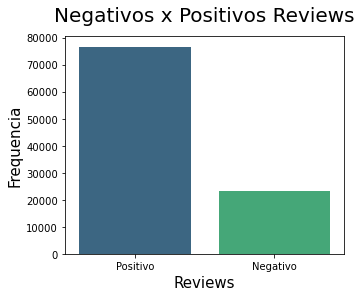

In [195]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x=reviews_grupos.reviews, y=reviews_grupos.Frequência,palette="viridis")
plt.title('Negativos x Positivos Reviews', fontsize = 20, pad = 15)
plt.ylabel('Frequencia',fontsize= 15)
plt.xlabel('Reviews',fontsize= 15)

Text(0.5, 1.0, 'Negativos x Positivos Reviews')

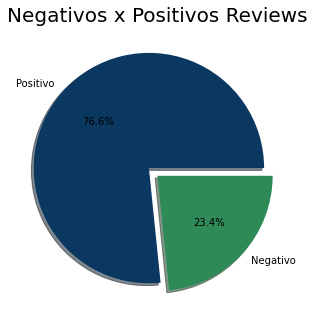

In [196]:
#destacar algumas fatias
fig = plt.figure(figsize = (5,4))
axes = fig.add_axes([0,0,1,1])

explodir = [0.1,0]

axes.pie(reviews_grupos['Porcentagem (%)'], labels = reviews_grupos.reviews,
        autopct = '%.1f%%', explode = explodir, shadow = True, colors= ['#0B3861','#2E8B57'])
axes.set_title('Negativos x Positivos Reviews', fontsize = 20, pad = 10)

In [177]:
# eliminar as colunas com valores ausentes
comments = reviews.dropna(subset=['review_comment_message'], axis=0)['review_comment_message']

# exemplos de descrições para os imóveis no Airbnb
display(comments.iloc[100])
display(comments.iloc[120])
display(comments.iloc[133])

'Produto muito bom'

'Cancelaram a minha compra um dia antes da entrega, liguei para a lannister e os atendentes não sabiam o que estava acontecendo, uma bagunça, agora estou esperando para ver se vai ser cobrado'

'Ao fazer a compra do kit entendi que receberia 2 frascos de 60 cápsulas (cada) e não 2 frascos com 60 cápsulas no total. Só não vou devolver porque estou precisando do produto.'

In [180]:
# Dropping NaN values
review_data  = reviews.dropna()
# Resetting the reviews index and visualizing the data
review_data = review_data.reset_index(drop=True)
review_data.head(3)
review_data.shape

(9986, 7)

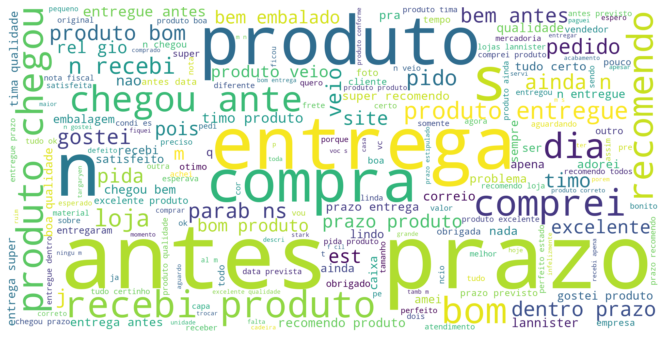

In [194]:
comments = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))
#Using wordcloud to visualize the comments
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('plot23.png', dpi=400, bbox_inches='tight')
plt.show()